# Explorative Data Analysis - King county house pricing

### Client: 
* Erin Robinson (Buyer)

### Characteristics:
* Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible

### Goal of this EDA:
* The purpose of this exploratory data analysis is to enable socially responsible, small-margin real estate transactions (purchases and sales) in poor urban neighborhoods. 

### Hypothesis:
* [Hypothesis 1](#hypothesis-1): There are economically weak(er) neighborhoods within the dataset of King County.
* [Hypothesis 2](#hypothesis-2): Selling date has an impact on house price.
* [Hypothesis 3](#hypothesis-3): Houses with more bedrooms are more costly.

### To define:
* socially responsible: 
   * giving families the chance to buy not too expansive houses: buying Houses for families
   * reselling not for more than x% over the mean price per category
   * small-margin real estate transactions -> reselling with a lower market rate <br><br>
* economically weak urban neighborhoods:   
   * first quartile mean price per square foot per zip code

# Import modules

In [1]:
#importing python modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import numpy as np
import missingno as msno
from scipy.stats import skew
import scipy.stats


In [2]:
#reading file
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
#first check, if file has been read correctly
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [ ]:
# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

In [4]:
# getting an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.shape

(21597, 21)

# Data Cleaning

In [7]:
#checking for duplicates -> there are no duplicates in this file
df.duplicated().value_counts()


False    21597
dtype: int64

# Transforming data types

In [8]:
# Transforming data types
df_c = df.copy(deep=True) #to safe the file as clean data - df_c(lean)

#transforming price column into an integer
print('Datatype price column:', type(df_c.price[0]))
df_c = df_c.astype({'price':'int64'})
print('Datatype price column:',type(df_c.price[0]))

Datatype price column: <class 'numpy.float64'>
Datatype price column: <class 'numpy.int64'>


In [9]:
#transforming date column to timestamp
print('Datatype date column:',type(df_c.date[0]))
df_c.date = pd.to_datetime(df_c.date, format='%m/%d/%Y')
df_c.head()
print('Datatype date column:',type(df_c.date[0]))

Datatype date column: <class 'str'>
Datatype date column: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
#first converting string values to NaN, then transforming sqft basement column from object to float
print('Datatype sqft basement column:',type(df_c.sqft_basement[6]))
df_c.query('sqft_basement == "?"')
df_c.sqft_basement = df_c.sqft_basement.replace('?', np.NaN)
df_c = df_c.astype({'sqft_basement':'float'})
print('Datatype sqft basement column:',type(df_c.sqft_basement[6]))


Datatype sqft basement column: <class 'str'>
Datatype sqft basement column: <class 'numpy.float64'>


In [11]:
# dropping columns not needed
df_c = df_c.drop(['waterfront', 'view'], axis=1)

# Missing Data

In [12]:
df_c.isna().sum()

id               0   
date             0   
price            0   
bedrooms         0   
bathrooms        0   
sqft_living      0   
sqft_lot         0   
floors           0   
condition        0   
grade            0   
sqft_above       0   
sqft_basement    454 
yr_built         0   
yr_renovated     3842
zipcode          0   
lat              0   
long             0   
sqft_living15    0   
sqft_lot15       0   
dtype: int64

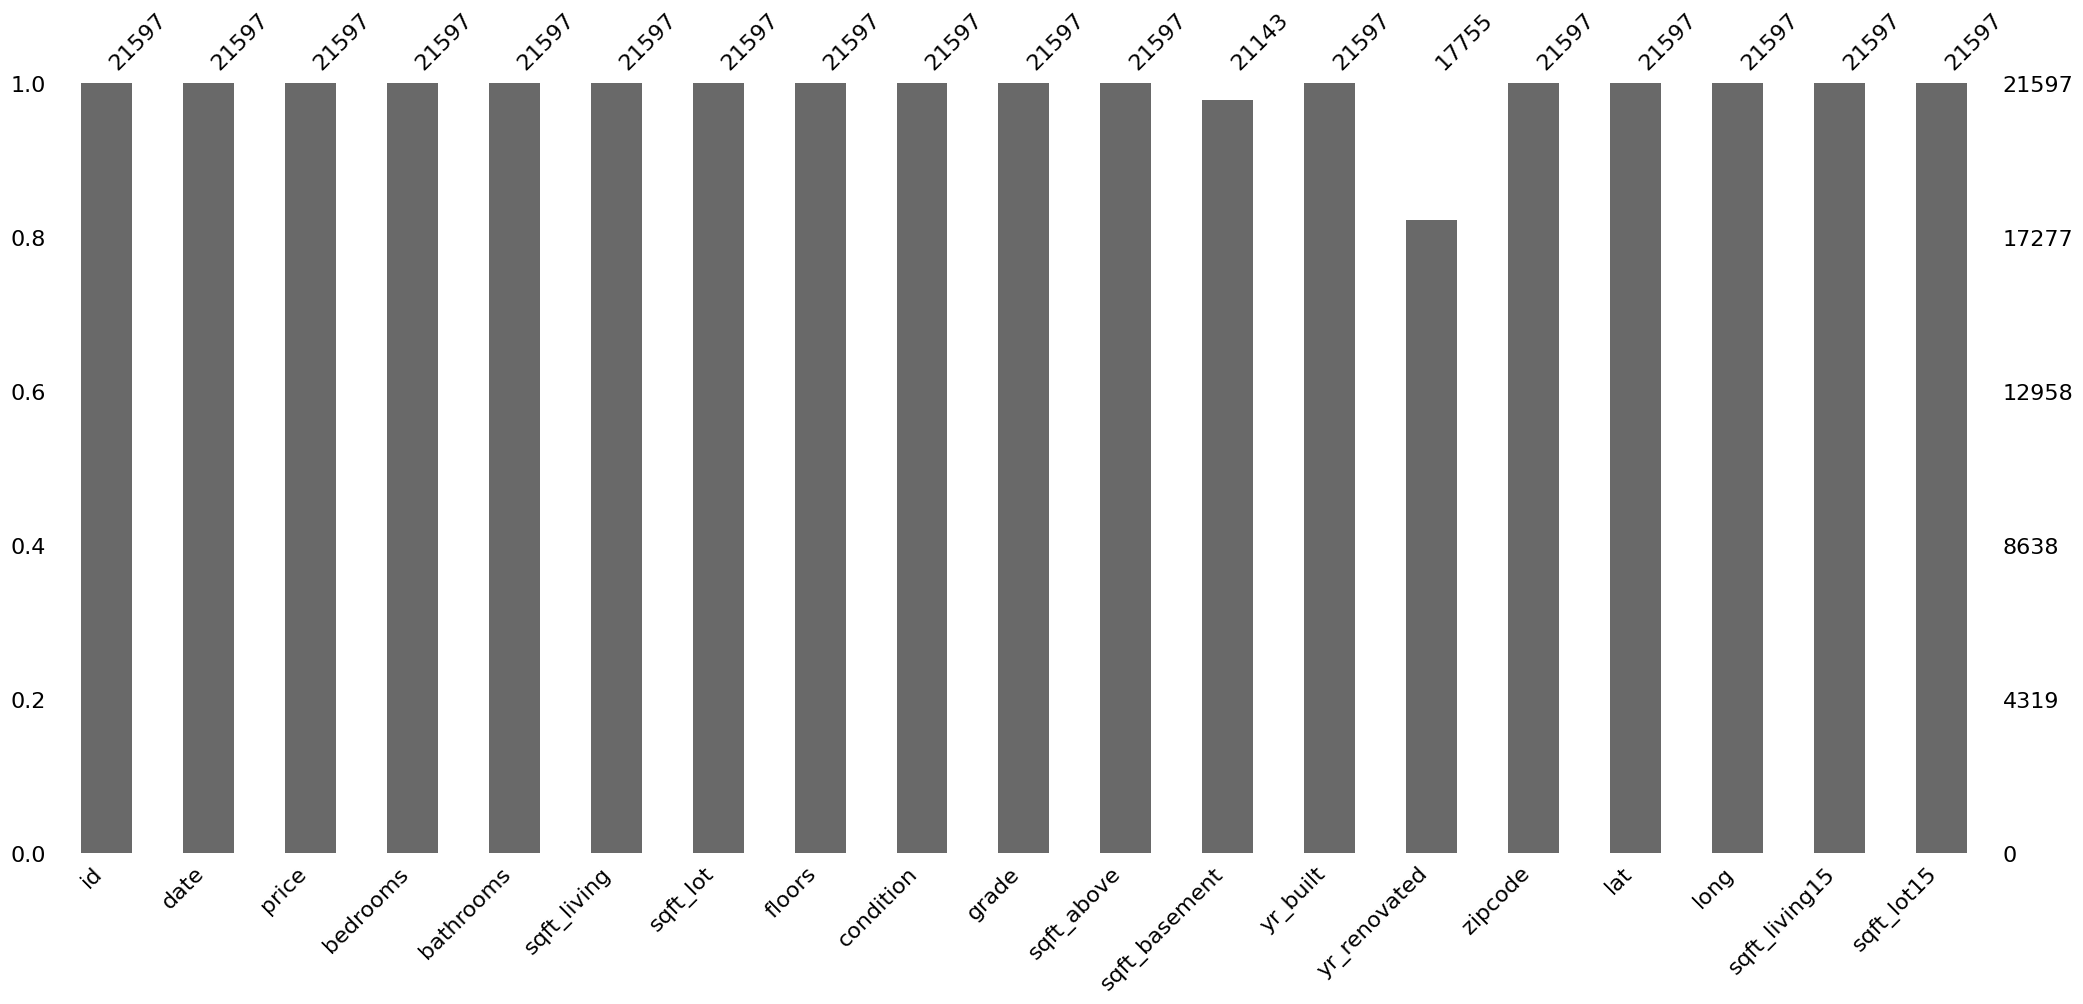

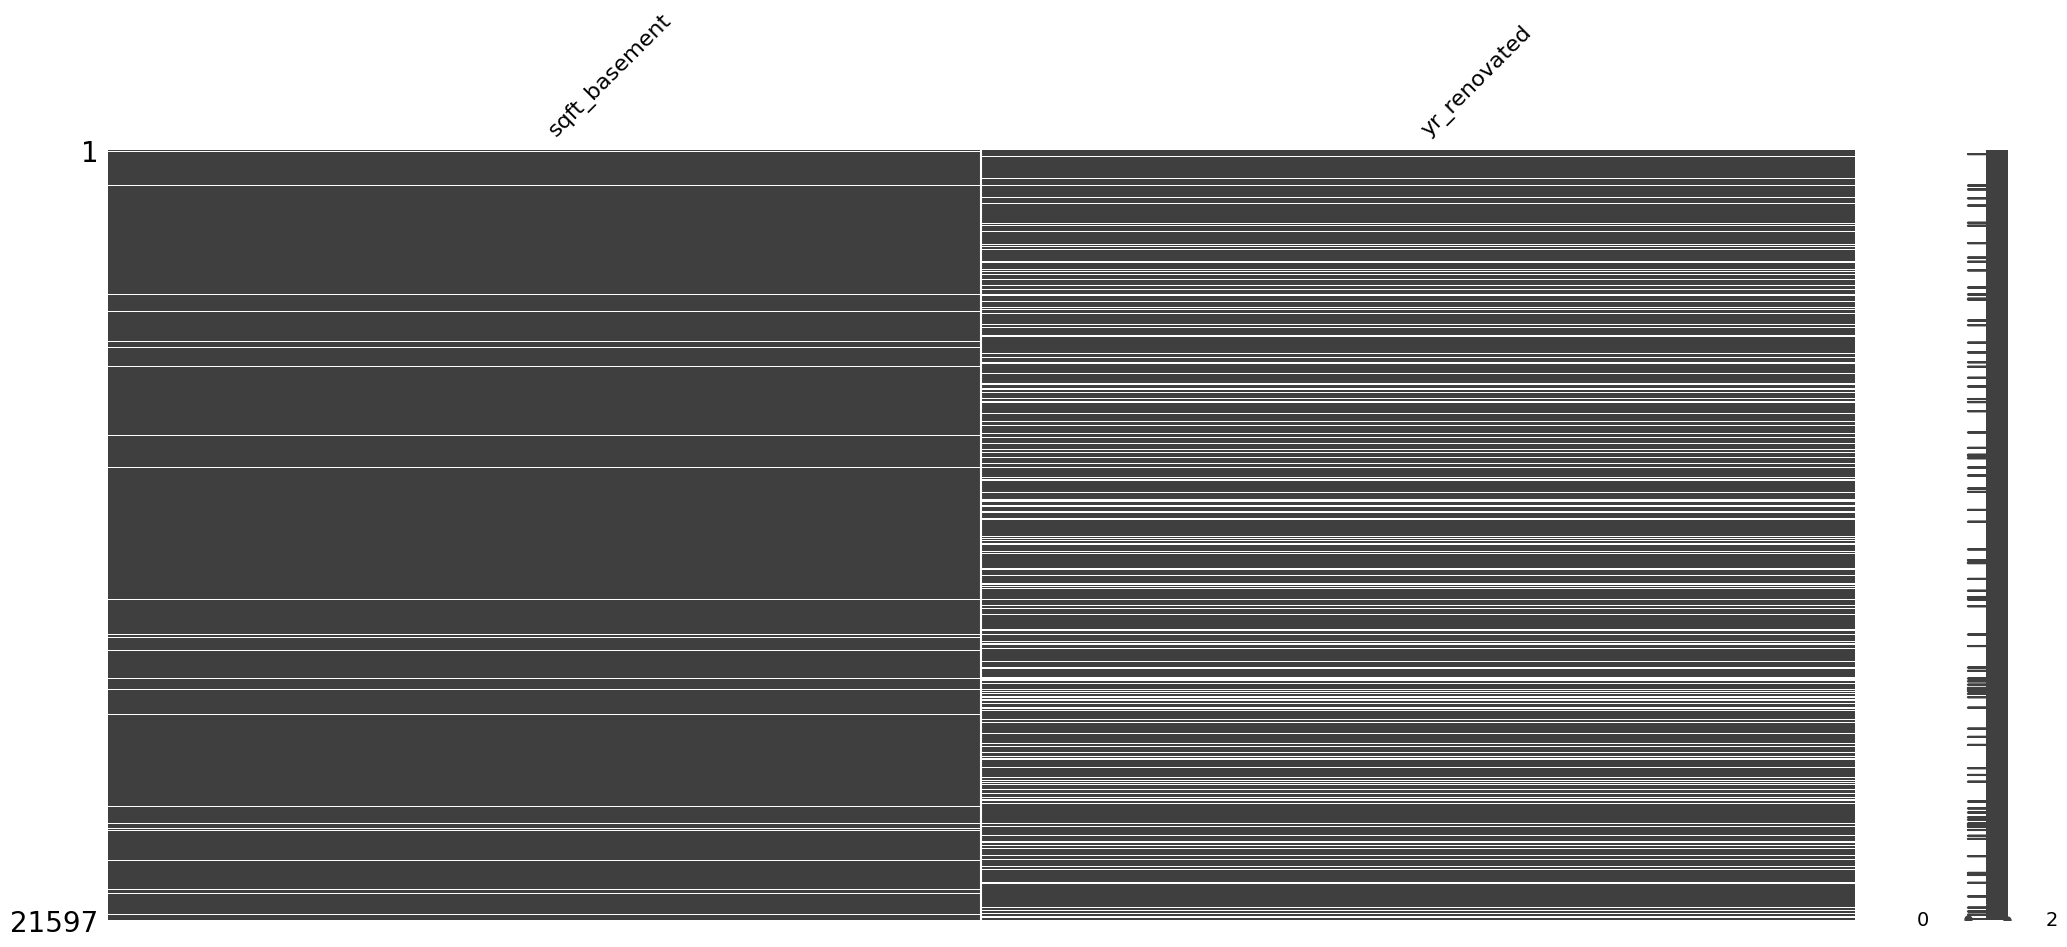

In [13]:
msno.bar(df_c)
msno.matrix(df_c[['sqft_basement', 'yr_renovated']]);

# Outliers

In [14]:
df_c.bedrooms.value_counts() # one with 33 bedrooms -> drop
df_c.query('bedrooms == 33')
df_c = df_c.drop(index=15856) 
df_c.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6     272 
1     196 
7     38  
8     13  
9     6   
10    3   
11    1   
Name: bedrooms, dtype: int64

In [15]:
# NaNs for yr_renovated are treated as the house has not been renovated
df_c.yr_renovated.value_counts()
df_c.yr_renovated.fillna(0, inplace=True)

#NaNs in sqft_basement are calculated using sqft_living and sqft_above
df_c.sqft_basement = (df_c.sqft_living - df_c.sqft_above)

''

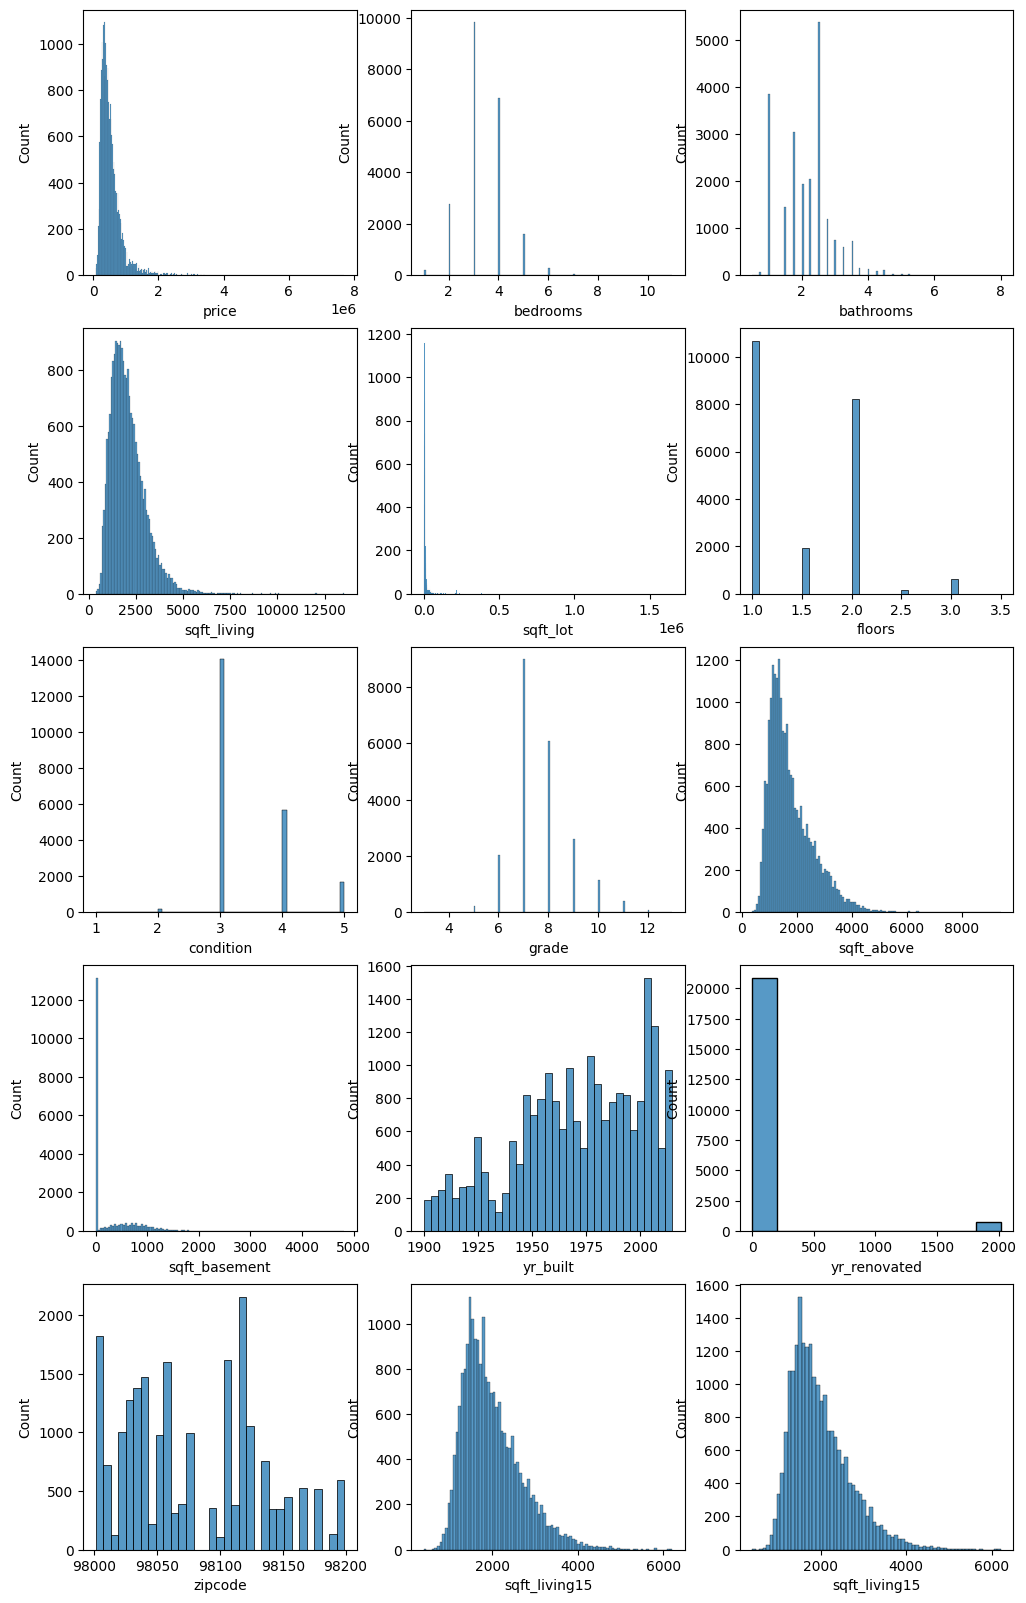

In [16]:
# plotting ferequency distribution
fig, axs = plt.subplots(5, 3, figsize=(12, 20))

sns.histplot(data=df_c, x="price", ax=axs[0, 0])
sns.histplot(data=df_c, x="bedrooms", ax=axs[0, 1])
sns.histplot(data=df_c, x="bathrooms", ax=axs[0, 2])
sns.histplot(data=df_c, x="sqft_living", ax=axs[1, 0])
sns.histplot(data=df_c, x="sqft_lot", ax=axs[1, 1])
sns.histplot(data=df_c, x="floors", ax=axs[1, 2])
sns.histplot(data=df_c, x="condition", ax=axs[2, 0])
sns.histplot(data=df_c, x="grade", ax=axs[2, 1])
sns.histplot(data=df_c, x="sqft_above", ax=axs[2, 2])
sns.histplot(data=df_c, x="sqft_basement", ax=axs[3, 0])
sns.histplot(data=df_c, x="yr_built", ax=axs[3, 1])
sns.histplot(data=df_c, x="yr_renovated", ax=axs[3, 2], bins=10)
sns.histplot(data=df_c, x="zipcode", ax=axs[4, 0])
sns.histplot(data=df_c, x="sqft_living15", ax=axs[4, 1])
sns.histplot(data=df_c, x="sqft_living15", ax=axs[4, 2], bins=70)
;


# Correlation

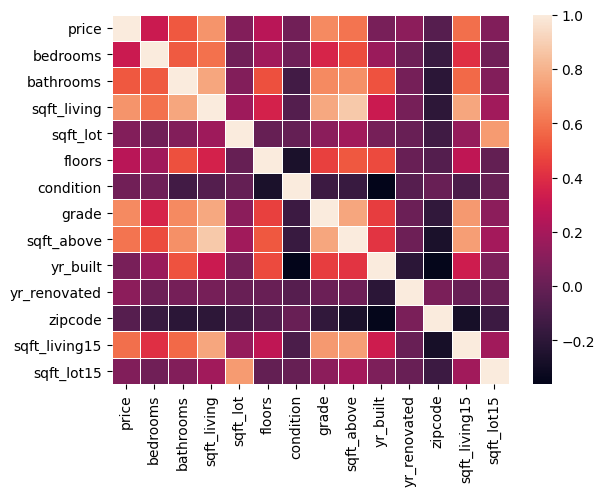

In [17]:
#plotting correlation
df_c.columns
df_corr = df_c[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
sns.heatmap(df_corr.corr(), cbar=True, linewidth=0.5);


In [18]:
df_correl_on_price = df_c.corr()['price'].sort_values().to_frame()
df_correl_on_price = df_correl_on_price.reset_index()
df_correl_on_price

,index,price
0,zipcode,-0.053409
1,id,-0.016763
2,long,0.022047
3,condition,0.036031
4,yr_built,0.053965
5,sqft_lot15,0.082849
6,sqft_lot,0.089879
7,yr_renovated,0.117858
8,floors,0.256820
9,lat,0.306687


In [19]:
scipy.stats.pearsonr(x=df_corr['price'], y=df_corr['sqft_living'])    

PearsonRResult(statistic=0.701928885966314, pvalue=0.0)

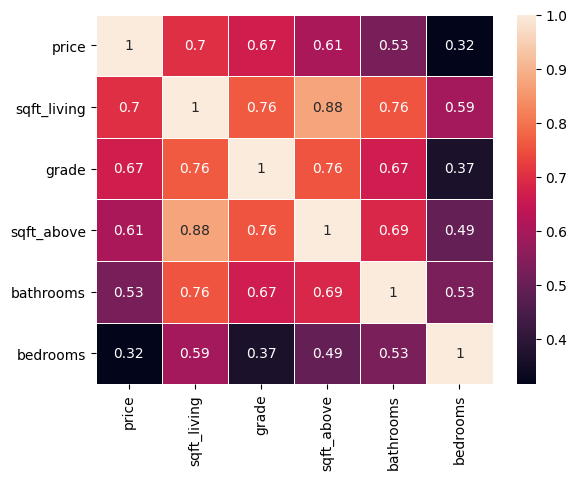

In [20]:
df_corr = df_c[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms']]
sns.heatmap(df_corr.corr(), cbar=True, linewidth=0.5, annot=True);

Sqare feet living and price are highly correlating. We now have a closer look at the scatterplot.

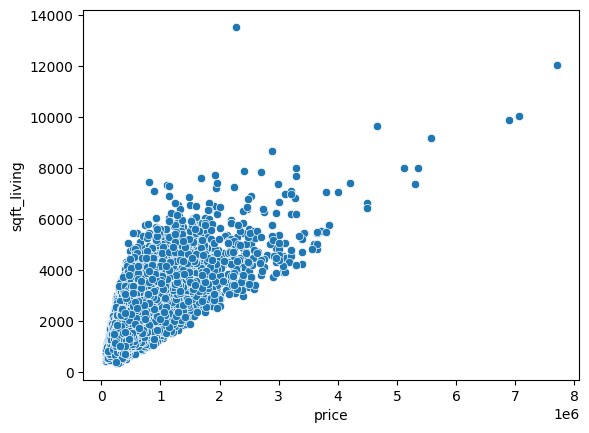

In [21]:
# scatterplot
sns.scatterplot(data=df_c, x='price', y='sqft_living');

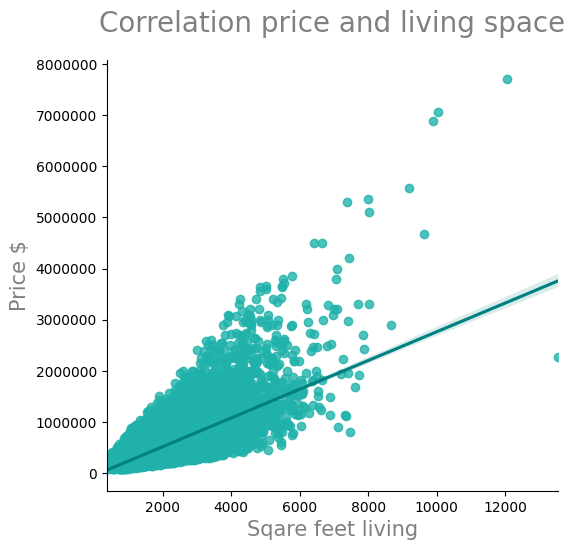

In [22]:
#create nicer looking plot for presentation with regression line
plot = sns.lmplot(data=df_c, x='sqft_living', y='price', scatter_kws={"color": "lightseagreen"}, line_kws={"color": "teal"})

plt.title('Correlation price and living space', color='grey', size=20, pad=20)
plt.xlabel('Sqare feet living', color='grey', size=15)
plt.ylabel('Price $', color = 'grey', size=15)
plt.ticklabel_format(style='plain', axis='y'); #preventing scientific notation


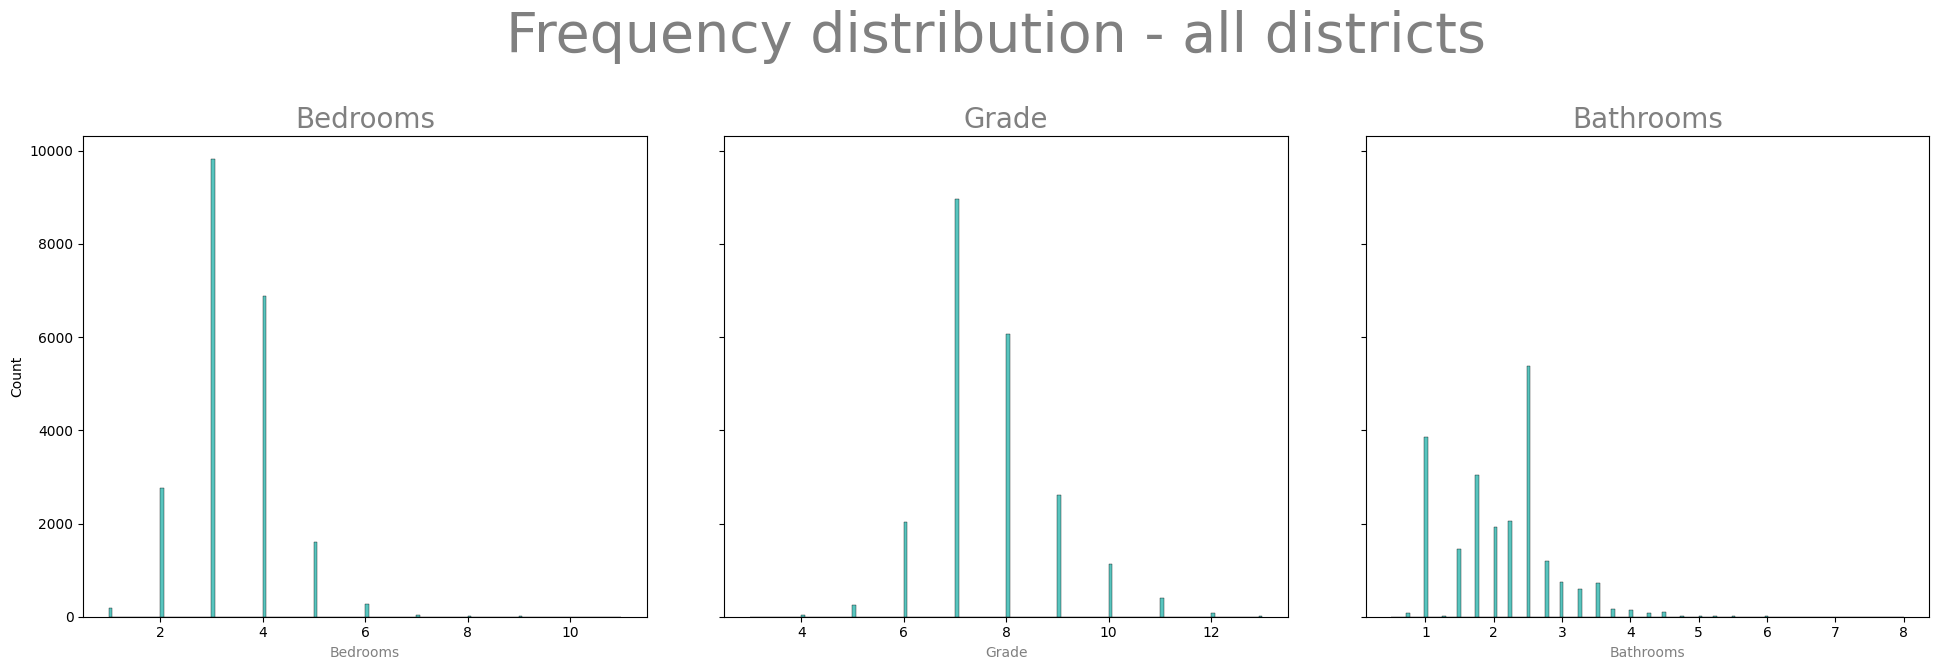

In [23]:
# Set subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Bedrooms', fontsize = 20, color = 'grey')
ax[1].set_title('Grade', fontsize = 20, color = 'grey')
ax[2].set_title('Bathrooms', fontsize = 20, color = 'grey')

ax[0].set_xlabel(xlabel='Bedrooms', color = 'grey')
ax[1].set_xlabel(xlabel='Grade', color = 'grey')
ax[2].set_xlabel(xlabel='Bathrooms', color = 'grey')


#add overall title and adjust it so that it doesn't overla'p with subplot titles
fig.suptitle('Frequency distribution - all districts', fontsize = 40, color = 'grey')

#plotting
sns.histplot(ax = ax[0],
            data = df_c,
            x= 'bedrooms',
            color= 'lightseagreen')

sns.histplot(ax = ax[1],
            data = df_c,
            x= 'grade',
            color = 'lightseagreen')

sns.histplot(ax = ax[2],
            data = df_c,
            x= 'bathrooms',
            color = 'lightseagreen')

ax[0].ticklabel_format(style='plain', axis='y') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='y')
ax[2].ticklabel_format(style='plain', axis='y')


plt.subplots_adjust(top=0.8)

We now filter data to have a look at correlations for most frequent categories of bedrooms, grade and bathrooms.

In [24]:
# filter dataframe and count observations meeting filtercriteria
df_c.query('bedrooms < 6 and grade < 11 and bathrooms < 3.75').id.count() #20505


20505

In [25]:
# filter dataframe and count observations meeting filtercriteria
df_c.query('bedrooms > 1 and bedrooms < 6 and grade >5 and grade < 11 and bathrooms >1 and bathrooms < 3.75').id.count()

16522

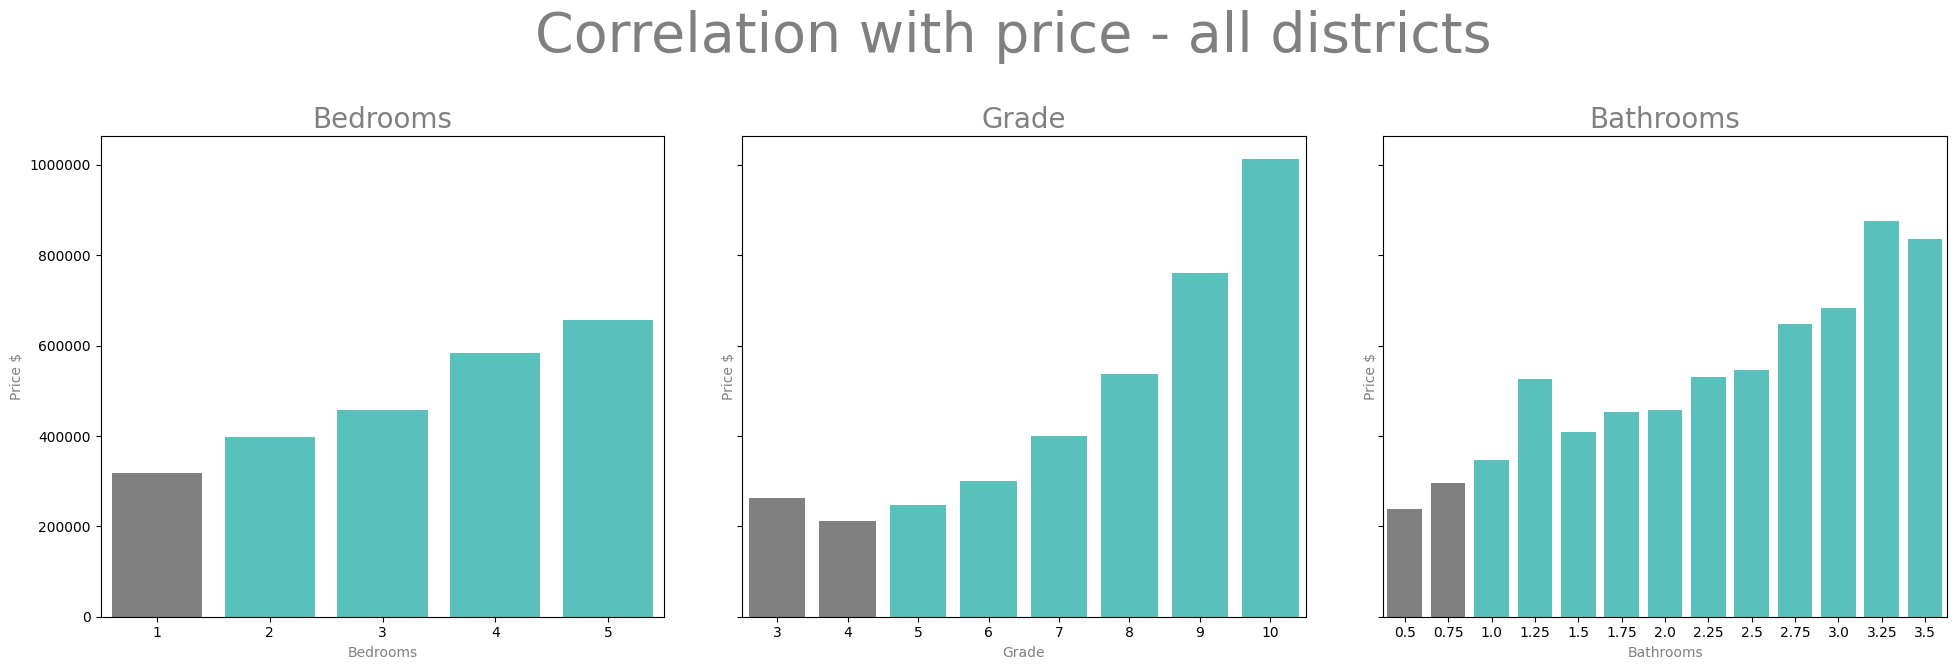

In [26]:
# plotting correlation bedrooms, grade and bathrooms with price

df_c_plot = df_c.query('bedrooms < 6 and grade < 11 and bathrooms < 3.75')

# Set subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True) #, sharey=True = sharing yaxis
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Bedrooms', fontsize = 20, color = 'grey')
ax[1].set_title('Grade', fontsize = 20, color = 'grey')
ax[2].set_title('Bathrooms', fontsize = 20, color = 'grey')

#add overall title and adjust it so that it doesn't overla'p with subplot titles
fig.suptitle('Correlation with price - all districts', fontsize = 40, color = 'grey')

color1 = ['grey', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']
color2 = ['grey', 'grey','mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']
color3 = ['grey', 'grey','mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']


#plotting
sns.barplot(ax = ax[0],
            data = df_c_plot,
            x= 'bedrooms',
            y= 'price',
            ci= None, 
            palette=color1)

sns.barplot(ax = ax[1],
            data = df_c_plot,
            x= 'grade',
            y= 'price',
            ci= None,
            palette=color2)

sns.barplot(ax = ax[2],
            data = df_c_plot,
            x= 'bathrooms',
            y= 'price',
            ci= None,
            palette=color3,
            )
#ax[1].ticklabel_format(style='plain')
#plt.ticklabel_format(scilimits=(0, 101))

ax[0].ticklabel_format(style='plain', axis='y') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='y')
ax[2].ticklabel_format(style='plain', axis='y')

ax[0].set_ylabel(ylabel='Price $', color = 'grey') #setting x and y labels
ax[1].set_ylabel(ylabel='Price $', color = 'grey')
ax[2].set_ylabel(ylabel='Price $', color = 'grey')
ax[0].set_xlabel(xlabel='Bedrooms', color = 'grey')
ax[1].set_xlabel(xlabel='Grade', color = 'grey')
ax[2].set_xlabel(xlabel='Bathrooms', color = 'grey')

plt.subplots_adjust(top=0.8); #adjusting space between Title and subplots




# Features
1. Sqare feet price 
2. Poor neighbourhood
3. Seasons and price

In [27]:
#sqft price
df_c = df_c.eval('sqft_price_liv = price/sqft_living')
df_c.sqft_price_liv = df_c.sqft_price_liv.round(2)

In [28]:
# enough data per zip? value_counts for price
df_c.zipcode.nunique()
observations_per_zip = df_c.groupby('zipcode').price.count()
opz = observations_per_zip.to_frame()
opz
#opz.query('price < 100') # 3 zipcodes unter 100 (80, 50. 57)


,price
zipcode,
98001,361
98002,199
98003,280
98004,317
98005,168
...,...
98177,255
98178,262
98188,136


In [29]:
# average (mean) price per square foot living per zipcode to define economically weak neighborhood
sqft_price_liv_per_zip = df_c.groupby('zipcode').sqft_price_liv.mean().round(2)
sqft_price_liv_per_zip = sqft_price_liv_per_zip.to_frame()
sqft_price_liv_per_zip.describe() # 25% quantile:  192.63 mean: 267.33
sqft_price_liv_per_zip.mean()
poorer_neighborhood = sqft_price_liv_per_zip.query('sqft_price_liv < 192.63')
poorer_neighborhood = poorer_neighborhood.reset_index()

In [30]:
sqft_price_liv_per_zip = sqft_price_liv_per_zip.sort_values('sqft_price_liv').reset_index()

''

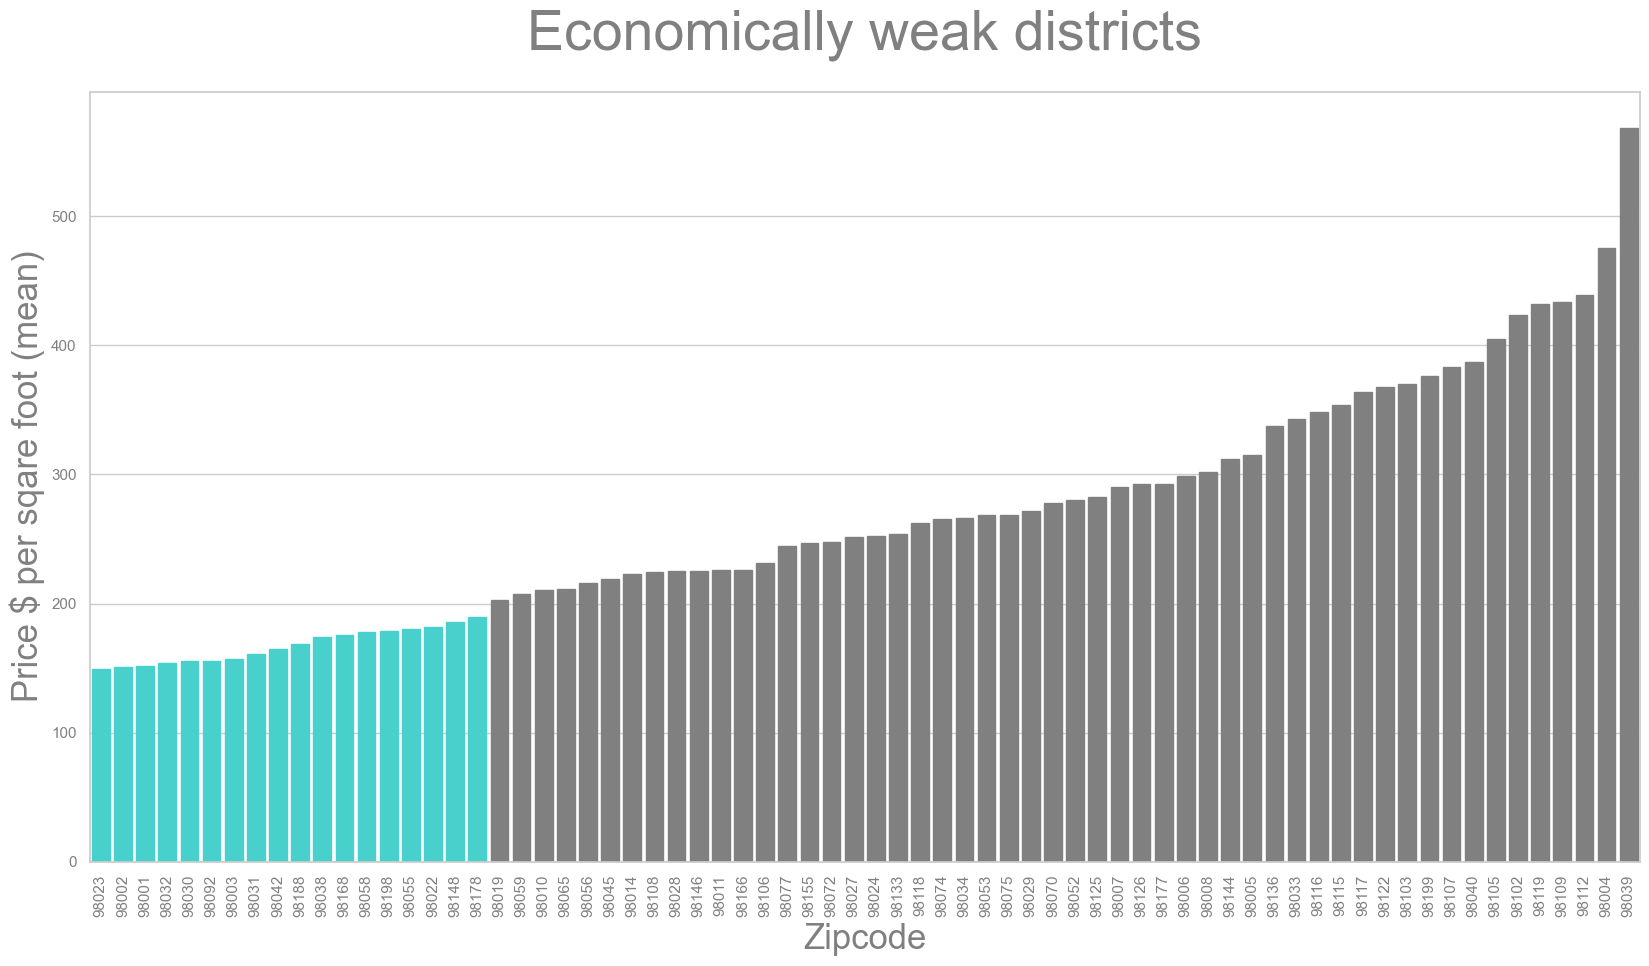

In [31]:
sns.set_theme(style="whitegrid")

plot_districts = sns.barplot(data= sqft_price_liv_per_zip, x= 'zipcode', y= 'sqft_price_liv', order=sqft_price_liv_per_zip.zipcode, color='lightblue')
for bar in plot_districts.patches:
    if bar.get_height() > 192.63:
        bar.set_color('grey')    
    else:
        bar.set_color('mediumturquoise')
plt.title('Economically weak districts', color='grey', size=40, pad=30)
plt.setp(plot_districts.get_xticklabels(), rotation=90, color='grey')
plt.setp(plot_districts.get_yticklabels(), rotation=0, color='grey')
plot_districts.set_ylabel("Price $ per sqare foot (mean)", fontsize=25, color='grey')
plot_districts.set_xlabel("Zipcode", fontsize=25, color='grey')
plt.gcf().set_size_inches(20,10)

;

### Hypothesis 1

There are economically weak(er) neighborhoods within the dataset of King County. Can be considered as true.

# DataFrame economically weak districts only

In [32]:
# create column for economically weak or not (bool)
zip_lst =[98002,98003, 98022, 98023, 98030, 98031, 98032, 98038, 98042, 98055, 98058, 98092, 98148, 98168, 98178, 98188,98198]
#df_cw = df_c  df_c.zipcode in zip_lst
df_c["ec_weak_zip"] = df_c.zipcode.isin(zip_lst)
#df_cw = df_c.copy(deep=True)
df_cw = df_c.drop(df_c[df_c.ec_weak_zip == False].index)

In [33]:
sqft_price_liv_per_zip.sqft_price_liv.mean() #267.3325714285715
df_cw.sqft_price_liv.mean() #167.44168537113606

167.44168537113606

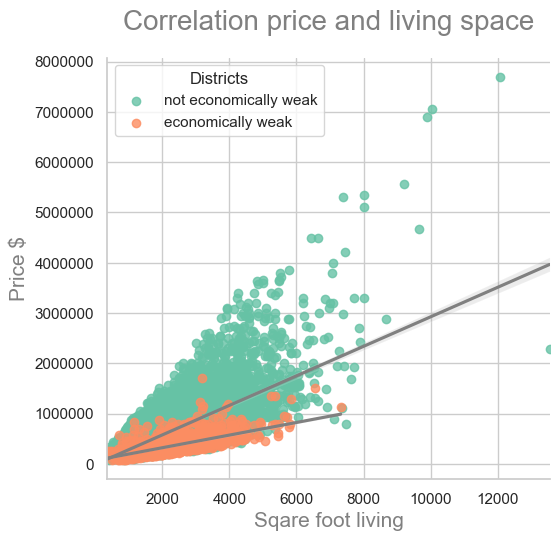

In [34]:
sns.set_theme(style="whitegrid")


plot =sns.lmplot(data=df_c, x='sqft_living', y='price', hue='ec_weak_zip', 
                 palette='Set2', line_kws={"color": "grey"}, legend=False);
plt.title('Correlation price and living space', color='grey', size=20, pad=20)

plt.xlabel('Sqare foot living', color='grey', size=15)
plt.ylabel('Price $', color = 'grey', size=15)
plt.ticklabel_format(style='plain', axis='y') #preventing scientific notation


# add legend
legend = plt.legend(title='Districts')
new_labels = ['not economically weak', 'economically weak']

# create new labels
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)


In [35]:
# calculate Pearson's r of price and sqft living for economically weak districts
pearson_ec_weak = scipy.stats.pearsonr(x=df_cw['price'], y=df_cw['sqft_living']) # pearson r = 76

# calculate Pearson's r of price and sqft living for economically not weak districts
df_cs = df_c.drop(df_c[df_c.ec_weak_zip == True].index)
pearson_ec_not_weak = scipy.stats.pearsonr(x=df_cs['price'], y=df_cs['sqft_living']) # pearson r = 0.73

print('Pearson\'s r of price and sqft living for economically weak districts:',pearson_ec_weak[0])
print('Pearson\'s r of price and sqft living for economically not weak districts:',pearson_ec_not_weak[0])

Pearson's r of price and sqft living for economically weak districts: 0.7590871147583527
Pearson's r of price and sqft living for economically not weak districts: 0.7320882493768923


# Seasons and price

In [36]:
# create column with year and month
df_c['year_month'] = df_c['date'].dt.strftime('%Y-%m')

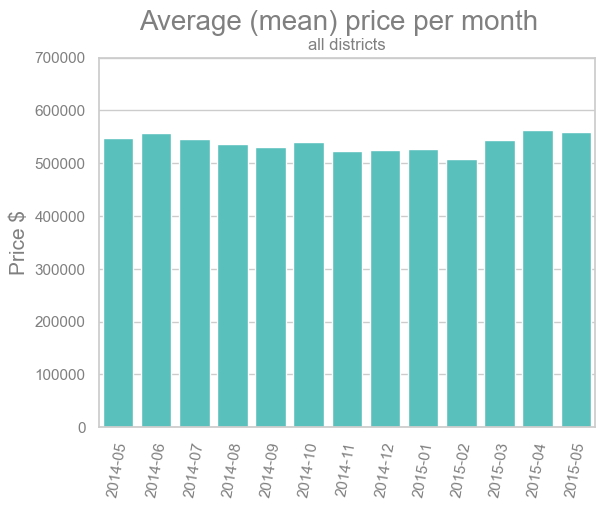

In [37]:
# plot average price per month to see wether there is seasonality
price_per_month = df_c.groupby('year_month').price.mean().round(2)
price_per_month = price_per_month.to_frame()
price_per_month = price_per_month.reset_index()
plot_ppm = sns.barplot(data=price_per_month, x='year_month', y='price', color='mediumturquoise')

plt.suptitle('Average (mean) price per month', color='grey', size=20)
plt.title('all districts', color='grey', size=12)
plt.setp(plot_ppm.get_xticklabels(), rotation=80, color='grey')
plt.setp(plot_ppm.get_yticklabels(), rotation=0, color='grey')
plt.xlabel('', color='grey', size=15)
plt.ylabel('Price $', color = 'grey', size=15)
plt.ylim(top=700000);


In [38]:
df.price.mean().round(2)

540296.57

In [39]:
# create column with information if economically weak or not
df_c["economically_weak"] = df_c.zipcode.isin([98001, 98001, 98003, 98003, 98023, 98030, 98031, 98032, 98038, 98042, 98055, 98058, 98092, 98148, 98168, 98178, 98188, 98198])
df_eco_weak = df_c.query('economically_weak == True')
#df_eco_weak.zipcode.unique()

''

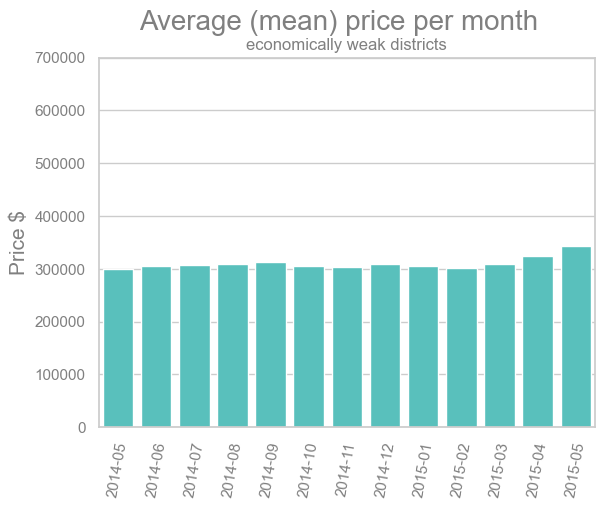

In [40]:
# plot average price per month to see wether there is seasonality in economically weaker districts
price_per_month = df_eco_weak.groupby('year_month').price.mean().round(2)
price_per_month = price_per_month.to_frame()
price_per_month = price_per_month.reset_index()
plot_ppm = sns.barplot(data=price_per_month, x='year_month', y='price', color='mediumturquoise')

plt.suptitle('Average (mean) price per month', color='grey', size=20)
plt.title('economically weak districts', color='grey', size=12)
plt.setp(plot_ppm.get_xticklabels(), rotation=80, color='grey')
plt.setp(plot_ppm.get_yticklabels(), rotation=0, color='grey')
plt.xlabel('', color='grey', size=15)
plt.ylabel('Price $', color = 'grey', size=15)
plt.ylim(top=700000)
;

### Hypothesis 2

Selling date has an impact on house price. This hypothesis has turned out to be of little relevance.

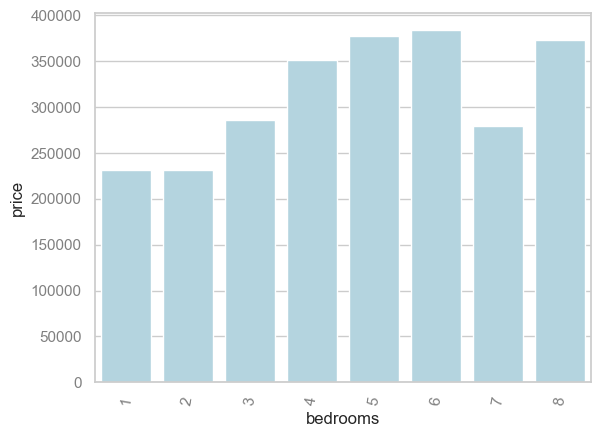

In [41]:
# plot mean price per bedrrom in economically weak districs
price_per_bedroom = df_eco_weak.groupby('bedrooms').price.mean().round(2)
price_per_bedroom = price_per_bedroom.to_frame()
price_per_bedroom = price_per_bedroom.reset_index()
plot_ppm = sns.barplot(data=price_per_bedroom, x='bedrooms', y='price', color='lightblue')
plt.setp(plot_ppm.get_xticklabels(), rotation=80, color='grey')
plt.setp(plot_ppm.get_yticklabels(), rotation=0, color='grey');

### Hypothesis 3

Houses with more bedrooms are more costly. There is a correlation between the number of bedrooms and the price. However, future work would have to investigate in more detail why there is a dip in the number of 7 bedrooms (but here we are also dealing with a small number of observations).

In [42]:
# mean price per grade economically weak districts
df_eco_weak.groupby('grade').price.mean().round(2)
df_eco_weak.grade.value_counts()




7     2525
8     1321
6     551 
9     406 
10    104 
5     73  
11    18  
4     9   
12    1   
Name: grade, dtype: int64

''

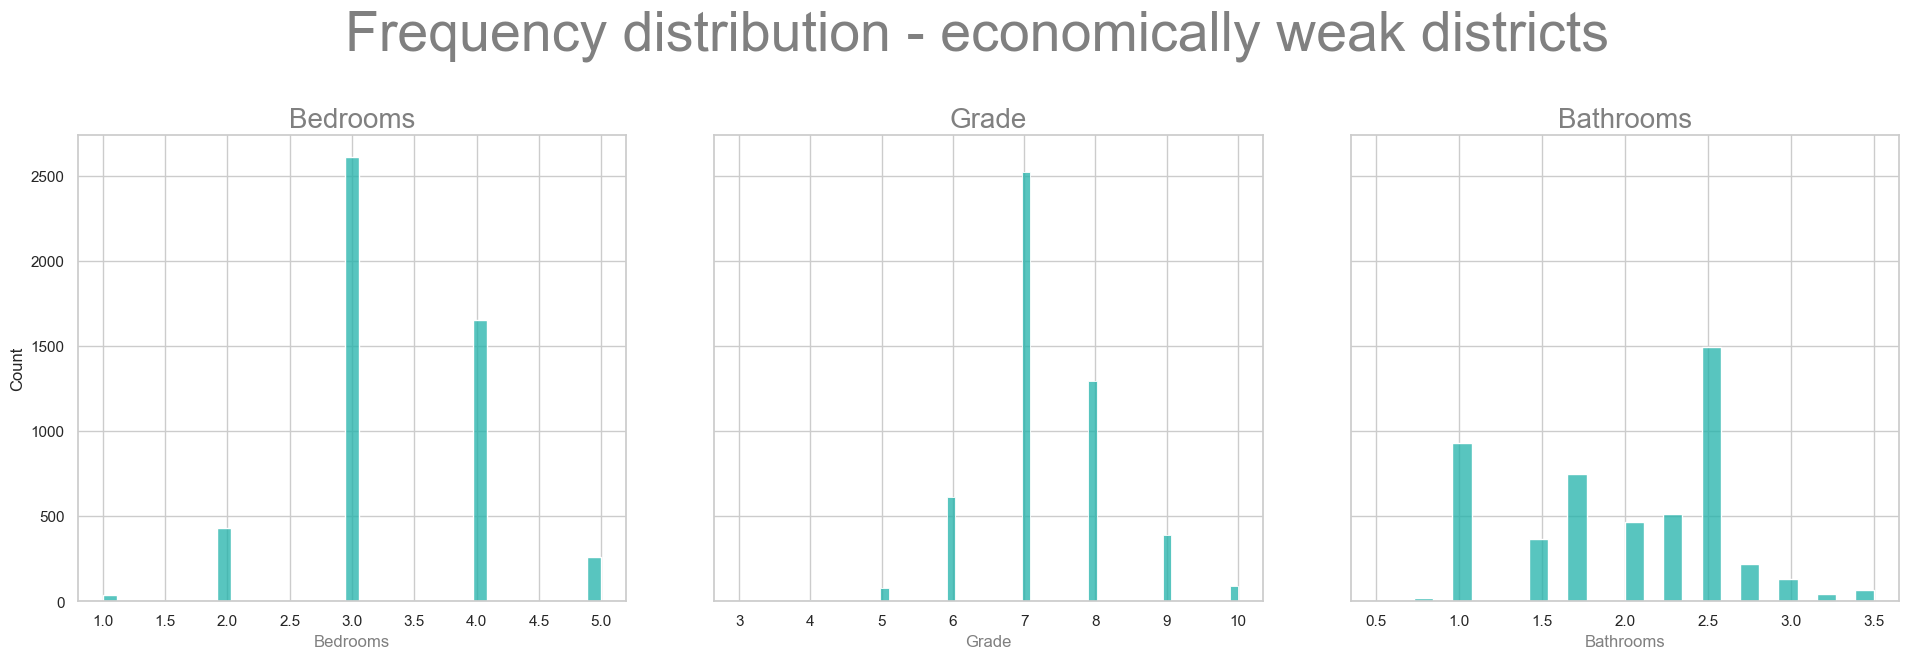

In [43]:
#plot frequency distribution of bedrooms, grade and bathrooms for economically weak districts

# Set subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Bedrooms', fontsize = 20, color = 'grey')
ax[1].set_title('Grade', fontsize = 20, color = 'grey')
ax[2].set_title('Bathrooms', fontsize = 20, color = 'grey')

ax[0].set_xlabel(xlabel='Bedrooms', color = 'grey')
ax[1].set_xlabel(xlabel='Grade', color = 'grey')
ax[2].set_xlabel(xlabel='Bathrooms', color = 'grey')


#add overall title and adjust it so that it doesn't overla'p with subplot titles

fig.suptitle('Frequency distribution - economically weak districts', fontsize = 40, color = 'grey')
plt.subplots_adjust(top=0.85)

df_cw_plot = df_cw.query('bedrooms < 6 and grade < 11 and bathrooms < 3.75')

#plotting
sns.histplot(ax = ax[0],
            data = df_cw_plot,
            x= 'bedrooms',
            color= 'lightseagreen')

sns.histplot(ax = ax[1],
            data = df_cw_plot,
            x= 'grade',
            color = 'lightseagreen')

sns.histplot(ax = ax[2],
            data = df_cw_plot,
            x= 'bathrooms',
            color = 'lightseagreen')

ax[0].ticklabel_format(style='plain', axis='y') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='y')
ax[2].ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(top=0.8)
;

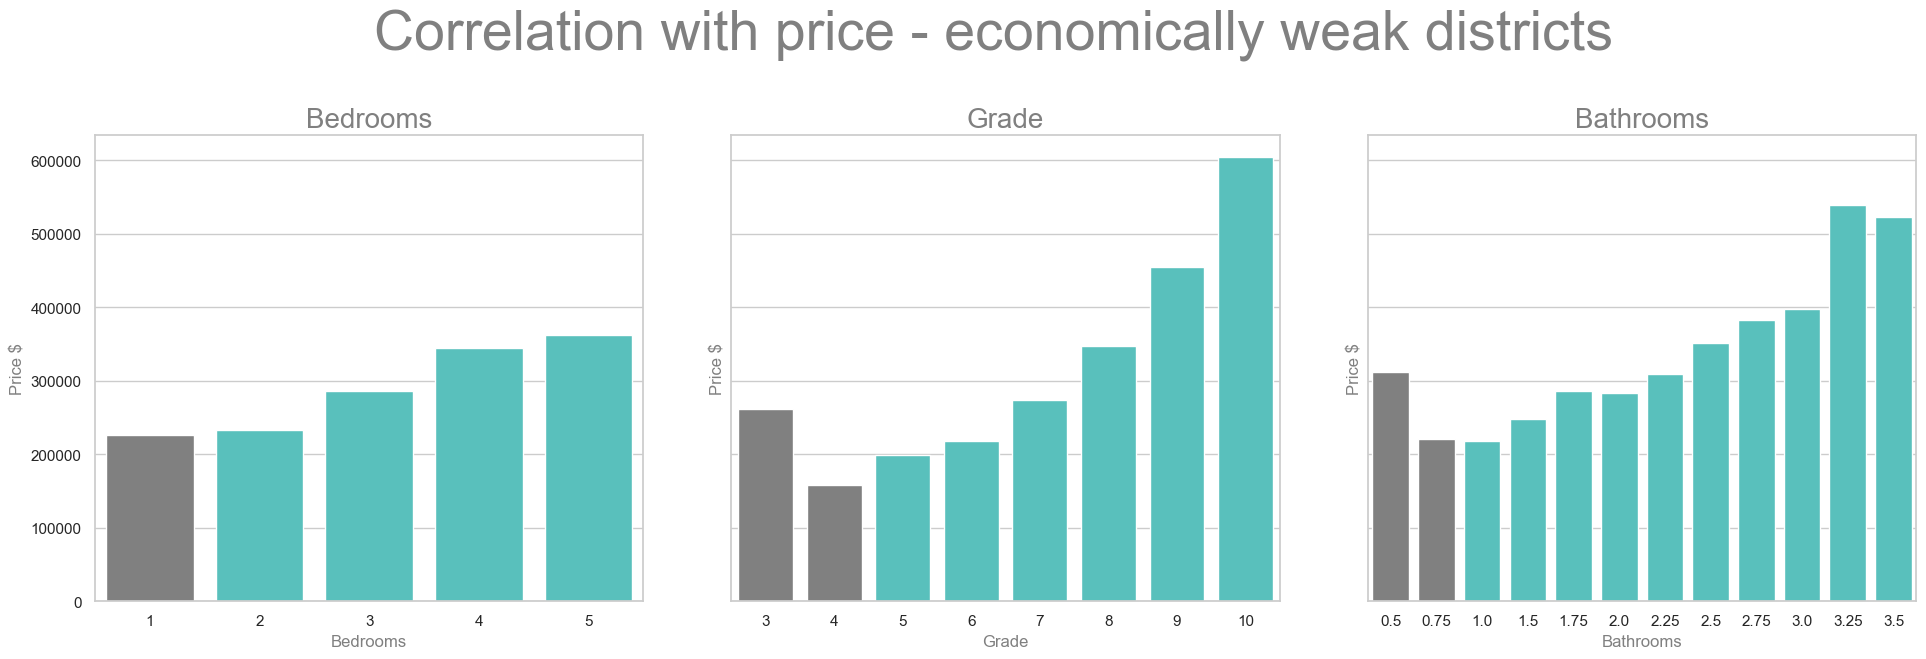

In [44]:
#plotting correlation bedrooms, grade and bathrooms with price for economically weak districs

df_cw_plot = df_cw.query('bedrooms < 6 and grade < 11 and bathrooms < 3.75')

# Set subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True) #, sharey=True = sharing yaxis
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Bedrooms', fontsize = 20, color = 'grey')
ax[1].set_title('Grade', fontsize = 20, color = 'grey')
ax[2].set_title('Bathrooms', fontsize = 20, color = 'grey')

#add overall title and adjust it so that it doesn't overla'p with subplot titles
fig.suptitle('Correlation with price - economically weak districts', fontsize = 40, color = 'grey')
plt.subplots_adjust(top=0.85)

#define color palette
color1 = ['grey', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']
color2 = ['grey', 'grey','mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']
color3 = ['grey', 'grey','mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise', 'mediumturquoise']

#plotting
sns.barplot(ax = ax[0],
            data = df_cw_plot,
            x= 'bedrooms',
            y= 'price',
            ci= None, 
            palette = color1)
            #color = 'mediumturquoise')
            #palette=["mediumturquoise" if x>2 else 'grey' for x in df_cw_plot.bedrooms])

sns.barplot(ax = ax[1],
            data = df_cw_plot,
            x= 'grade',
            y= 'price',
            ci= None,
            palette=color2)

sns.barplot(ax = ax[2],
            data = df_cw_plot,
            x= 'bathrooms',
            y= 'price',
            ci= None,
            palette=color3)
#ax[1].ticklabel_format(style='plain')
#plt.ticklabel_format(scilimits=(0, 101))

ax[0].ticklabel_format(style='plain', axis='y') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='y')
ax[2].ticklabel_format(style='plain', axis='y')

ax[0].set_ylabel(ylabel='Price $', color = 'grey') #setting x and y labels
ax[1].set_ylabel(ylabel='Price $', color = 'grey')
ax[2].set_ylabel(ylabel='Price $', color = 'grey')
ax[0].set_xlabel(xlabel='Bedrooms', color = 'grey')
ax[1].set_xlabel(xlabel='Grade', color = 'grey')
ax[2].set_xlabel(xlabel='Bathrooms', color = 'grey')

plt.subplots_adjust(top=0.8); #'adjusting space between Title and subplots'

In [45]:
# calculate average costs per bedroom more
beds_5 =df_cw.query('bedrooms > 4 and bedrooms < 6').price.mean() #378887.59856630827
beds_2 =df_cw.query('bedrooms > 1 and bedrooms < 3').price.mean() #233052.38194444444
beds_2
difference_per_bedroom_plus = (beds_5 - beds_2)/3
print('Average difference per bedroom more:', difference_per_bedroom_plus.round(2), '$')

Average difference per bedroom more: 48611.74 $


In [46]:
# calculate average costs per grade more
grade_5 =df_cw.query('grade > 4 and grade < 6').price.mean() #199476.41975308643
grade_10 =df_cw.query('grade > 9 and grade < 11').price.mean() #620820.2970297029

difference_per_grade_plus = (grade_10 - grade_5)/5
print('Average difference per 1 grade higher:', difference_per_grade_plus.round(2), '$')


Average difference per 1 grade higher: 84268.78 $


In [47]:
# calculate average costs per bathroom feature more
bath_1 =df_cw.query('bathrooms > 0.75 and bathrooms < 1.5').price.mean() #218161.6623655914
bath_3 =df_cw.query('bathrooms > 3.25 and bathrooms < 3.75').price.mean() #529705.5555555555

difference_per_bathroom_plus = (bath_3 - bath_1)/9
print('Average difference per bathroom feature more:', difference_per_bathroom_plus.round(2), '$')


Average difference per bathroom feature more: 34615.99 $
